In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

path = 'dataset/Train.csv'

In [143]:
pd.set_option('display.max_columns', 60)

df = pd.read_csv(path)
df.head()

,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,personal_loan_active,vehicle_loan_active,personal_loan_closed,vehicle_loan_closed,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,12554,current,M,35,708,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26.0,10.0,48.0,14.0,47.0,430000.0,1.0,1.0,1.0,1.0,593.20,1244.14,787.0,6885.0,85919.48,25192.00,24.0,6.0,25296.0,11527.50,191777.13,2.0,40.0,24563.0,30051.32,12761.0,2.0,65.0,50836.0,Y,1674.09,20014.0
1,17645,current,M,35,123,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7.0,13.0,3.0,21.0,31.0,127500.0,1.0,1.0,1.0,1.0,213557.15,172678.56,90525.0,1500.0,12255.75,88693.37,35.0,36.0,80750.0,92276.57,71162.00,2.0,78.0,23948.0,42119.05,76206.0,21.0,63.0,23226.0,Y,13043.34,10173.0
2,7604,current,M,55,802,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32.0,102.0,4.0,1.0,80.0,199999.0,1.0,1.0,1.0,1.0,165907.57,470000.00,25524.0,3735.0,34193.00,84880.00,72.0,9.0,38466.0,19343.00,70978.00,2.0,82.0,10752.0,58373.25,75283.0,7.0,1.0,27036.0,Y,25375.27,16095.0
3,1590,current,F,29,867,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1.0,50.0,1.0,1.0,10.0,155000.0,1.0,1.0,1.0,1.0,81872.65,223379.40,48500.0,-4679.0,11558.23,236326.00,43.0,30.0,52732.0,43867.91,63033.84,23.0,38.0,12607.0,69851.51,68708.0,21.0,83.0,43037.0,Y,3544.33,7707.0
4,16556,current,M,34,802,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47.0,82.0,54.0,16.0,68.0,297000.0,1.0,1.0,1.0,1.0,568.80,385000.00,183999.0,6916.0,17022.81,58897.03,46.0,36.0,19613.0,153253.71,30286.00,24.0,50.0,25213.0,10071.00,80140.0,8.0,32.0,32044.0,Y,12780.44,96408.0


## Dropping irrelevant columns

In [144]:
df = df.drop(
    [   
        'ID',
        'region_code',
        
        'personal_loan_active', 
        'personal_loan_closed', 
        'vehicle_loan_active', 
        'vehicle_loan_closed', 
        
        'debit_count_apr',
        'debit_count_may',
        'debit_count_jun',
        
        'credit_count_apr',
        'credit_count_may',
        'credit_count_jun',
        
        'loan_enq'
        
    ], axis=1)

## Combinig April, May, June cc and dc consumption

In [146]:
no_of_months = 3

df['cc_cons_avg'] = (df.cc_cons_apr + df.cc_cons_may + df.cc_cons_jun) / no_of_months
df['dc_cons_avg'] = (df.dc_cons_apr + df.dc_cons_may + df.cc_cons_jun) / no_of_months

In [147]:
df = df.drop([
        'cc_cons_apr',
        'cc_cons_may',
        'cc_cons_jun',

        'dc_cons_apr',
        'dc_cons_may',
        'dc_cons_jun',
    
        'cc_count_apr',
        'cc_count_may',
        'cc_count_jun',
    
        'dc_count_apr',
        'dc_count_may',
        'dc_count_jun',
    
    ], axis=1)

## Dropping rows with credit limit 0

In [148]:
df = df[df.card_lim > 0]

## Imputing age > 70 with mode 

In [149]:
mode = df.loc[df.age <= 70, 'age'].mode()

df.loc[df.age > 70, 'age'] = np.nan
df = df.fillna(mode)

df.describe()

,age,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,max_credit_amount_jun,emi_active,cc_cons,cc_cons_avg,dc_cons_avg,cc_count_avg,dc_count_avg
count,14433.000000,14964.000000,1.496400e+04,1.496400e+04,14964.000000,14964.000000,1.496400e+04,1.496400e+04,1.496400e+04,1.496400e+04,1.496400e+04,1.496400e+04,1.496400e+04,1.496400e+04,1.496400e+04,1.496400e+04,14964.000000,14964.000000,14964.000000,14964.000000,14964.000000
mean,42.664450,277671.559142,6.198422e+05,2.332940e+05,44462.971057,3522.067082,6.828904e+04,8.080678e+04,5.439408e+04,6.552806e+04,8.356510e+04,5.720811e+04,7.618873e+04,7.851045e+04,5.260045e+04,1.574706e+04,55125.981957,15477.751817,9338.188769,38.828121,20.478638
std,12.199736,179129.458463,3.089789e+06,4.071666e+05,88152.871269,7368.374949,1.127828e+05,1.991243e+05,1.953064e+05,1.017335e+05,1.777223e+05,2.002474e+05,1.546512e+05,1.483396e+05,1.283941e+05,1.180395e+05,97593.000279,13801.311900,10088.363527,39.751965,12.995846
min,25.000000,10000.000000,3.000000e-01,3.000000e+00,462.000000,-12179.000000,4.010000e+00,6.138000e+01,1.000000e+00,2.820000e+01,1.061000e+01,2.500000e-01,5.230000e+00,1.188000e+01,6.000000e-02,0.000000e+00,0.000000,514.956667,380.506667,1.000000,1.000000
25%,33.000000,124000.000000,6.100000e+03,3.817300e+04,2214.000000,0.000000,2.328507e+04,2.684600e+04,2.068225e+04,2.100333e+04,2.541027e+04,2.008300e+04,2.571067e+04,2.492008e+04,1.903950e+04,1.550865e+03,6764.750000,7334.617083,4115.643333,18.333333,9.666667
50%,38.000000,272000.000000,4.524950e+04,1.110000e+05,13873.000000,2351.000000,4.197025e+04,4.704900e+04,3.191400e+04,3.823568e+04,4.814000e+04,3.140300e+04,4.584750e+04,4.587936e+04,3.042550e+04,3.953580e+03,13364.000000,11818.423333,6773.078333,30.333333,19.333333
75%,53.000000,400000.000000,1.617040e+05,2.450000e+05,48950.000000,6885.000000,7.537767e+04,8.591945e+04,5.255900e+04,7.440055e+04,9.457115e+04,5.590796e+04,8.464518e+04,8.551100e+04,5.320200e+04,9.372410e+03,20105.750000,19073.650833,11220.295000,44.666667,29.000000
max,69.000000,1000000.000000,6.597743e+07,5.000000e+06,610000.000000,35346.000000,5.156864e+06,1.059212e+07,1.202915e+07,4.252567e+06,1.060175e+07,1.000000e+07,6.539810e+06,6.611953e+06,5.200000e+06,7.447125e+06,408382.000000,387231.370000,314984.483333,406.666667,73.000000


## Handling Outliers

### Numerical columns

In [167]:
num_cols = df.select_dtypes(exclude='object').columns

### Boxplots for outlier visualisation

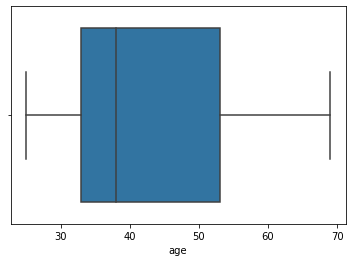

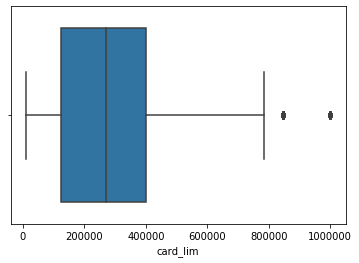

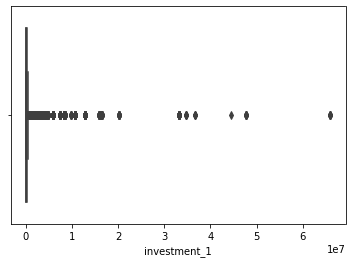

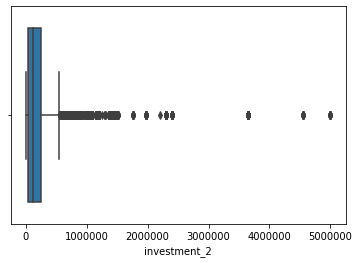

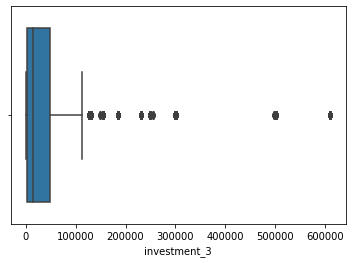

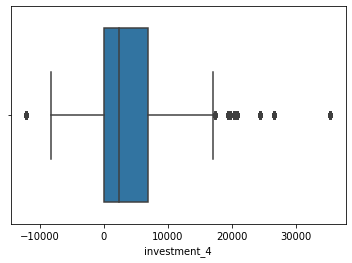

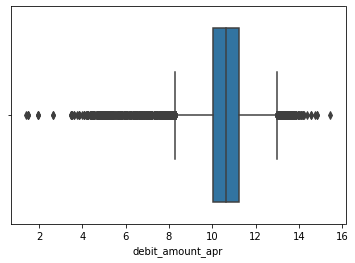

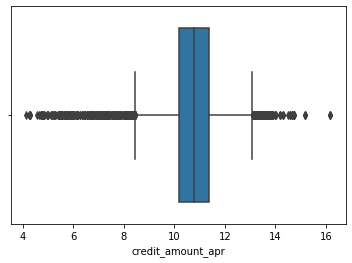

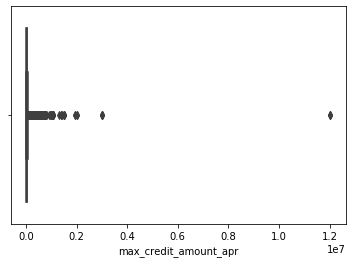

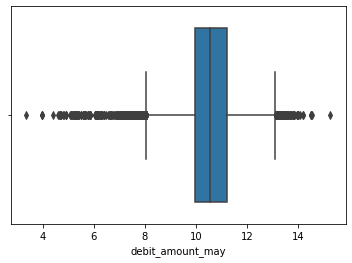

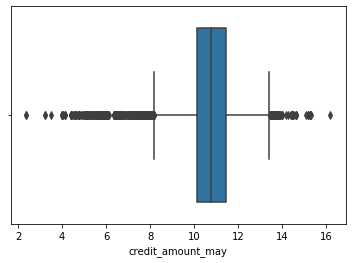

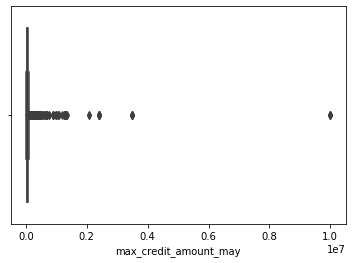

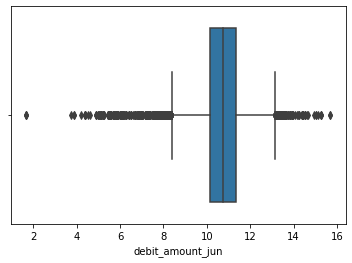

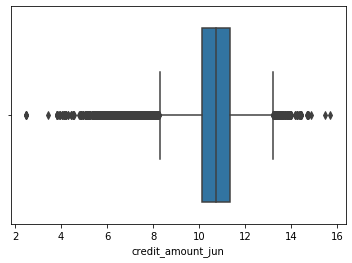

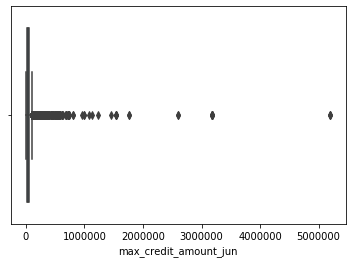

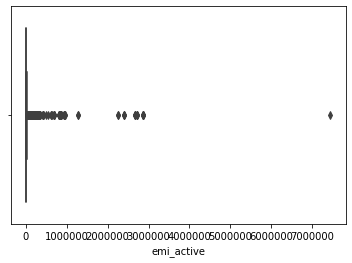

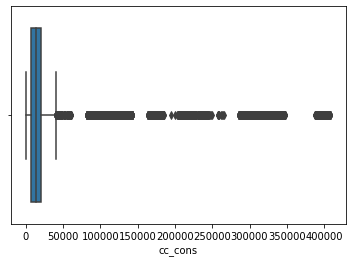

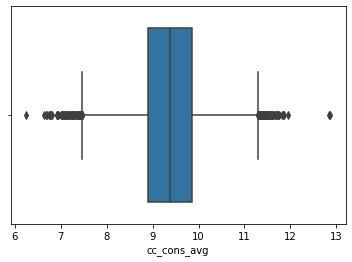

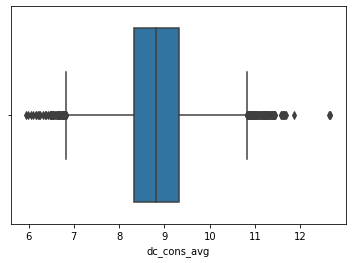

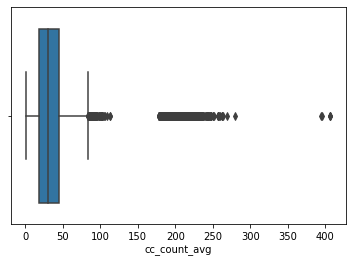

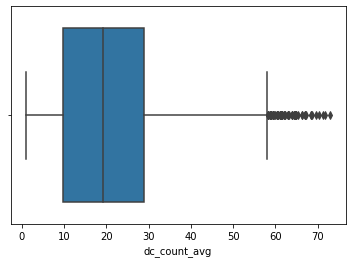

In [168]:
for col in num_cols:
    
    sns.boxplot(df[col])
    plt.show()

### Finding IQR for all columns

In [161]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

iqr = q3 - q1
iqr

age                          20.000000
card_lim                 276000.000000
investment_1             155604.000000
investment_2             206827.000000
investment_3              46736.000000
investment_4               6885.000000
debit_amount_apr              1.174699
credit_amount_apr             1.163293
max_credit_amount_apr     31876.750000
debit_amount_may              1.264782
credit_amount_may             1.314199
max_credit_amount_may     35824.957500
debit_amount_jun              1.191562
credit_amount_jun             1.232971
max_credit_amount_jun     34162.500000
emi_active                 7821.545000
cc_cons                   13341.000000
cc_cons_avg                   0.955703
dc_cons_avg                   1.002929
cc_count_avg                 26.333333
dc_count_avg                 19.333333
dtype: float64

## Dropping outliers 
### entries with values < 1.5 X IQR or > 1.5 X IQR

In [193]:
df = df[((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis=1)]
df.head()

,account_type,gender,age,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,max_credit_amount_jun,emi_active,cc_cons,cc_cons_avg,dc_cons_avg,cc_count_avg,dc_count_avg
2,current,M,55.0,199999.0,165907.57,470000.00,25524.0,3735.0,10.439776,11.348994,38466.0,9.870086,11.170125,10752.0,10.974613,11.229010,27036.0,25375.27,16095.0,9.262288,9.230580,59.000000,28.333333
4,current,M,34.0,297000.0,568.80,385000.00,183999.0,6916.0,9.742309,10.983546,19613.0,11.939850,10.318441,25213.0,9.217415,11.291530,32044.0,12780.44,96408.0,8.442929,8.203946,65.333333,46.000000
5,current,M,27.0,150000.0,63590.40,142608.50,96558.0,-4664.0,10.408769,10.447642,18433.0,10.486449,9.882468,21440.0,10.864612,12.205700,17284.0,5026.50,130263.0,9.335334,8.471473,24.000000,13.333333
6,current,M,32.0,187000.0,48796.45,74599.90,33774.0,3983.0,10.051686,9.842941,19157.0,10.934187,11.082050,20444.0,10.216639,12.208026,6779.0,1534.93,113479.0,8.656572,8.436568,5.666667,20.666667
10,saving,M,46.0,390000.0,72937.76,76365.24,908.0,4795.0,7.948742,8.570165,12515.0,12.017792,11.346485,15636.0,10.486360,11.943720,21564.0,296.29,15896.0,10.901303,10.325711,56.000000,28.666667


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11318 entries, 2 to 14999
Data columns (total 23 columns):
account_type             11318 non-null object
gender                   11318 non-null object
age                      10892 non-null float64
card_lim                 11318 non-null float64
investment_1             11318 non-null float64
investment_2             11318 non-null float64
investment_3             11318 non-null float64
investment_4             11318 non-null float64
debit_amount_apr         11318 non-null float64
credit_amount_apr        11318 non-null float64
max_credit_amount_apr    11318 non-null float64
debit_amount_may         11318 non-null float64
credit_amount_may        11318 non-null float64
max_credit_amount_may    11318 non-null float64
debit_amount_jun         11318 non-null float64
credit_amount_jun        11318 non-null float64
max_credit_amount_jun    11318 non-null float64
emi_active               11318 non-null float64
cc_cons                  1131

## Managing Skewed Data

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11318 entries, 2 to 14999
Data columns (total 23 columns):
account_type             11318 non-null object
gender                   11318 non-null object
age                      10892 non-null float64
card_lim                 11318 non-null float64
investment_1             11318 non-null float64
investment_2             11318 non-null float64
investment_3             11318 non-null float64
investment_4             11318 non-null float64
debit_amount_apr         11318 non-null float64
credit_amount_apr        11318 non-null float64
max_credit_amount_apr    11318 non-null float64
debit_amount_may         11318 non-null float64
credit_amount_may        11318 non-null float64
max_credit_amount_may    11318 non-null float64
debit_amount_jun         11318 non-null float64
credit_amount_jun        11318 non-null float64
max_credit_amount_jun    11318 non-null float64
emi_active               11318 non-null float64
cc_cons                  1131

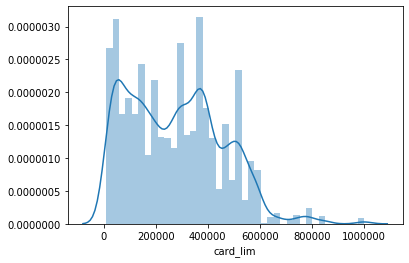

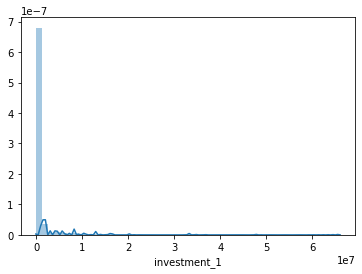

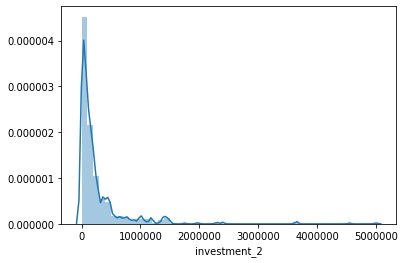

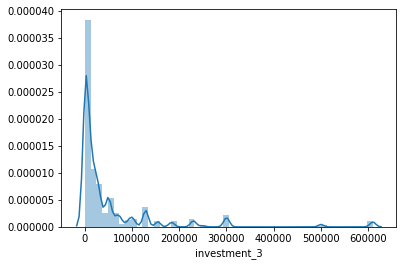

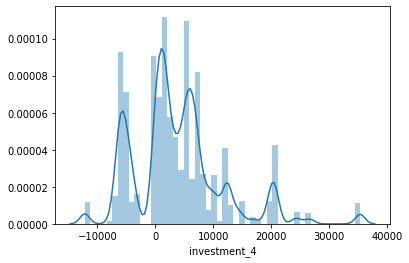

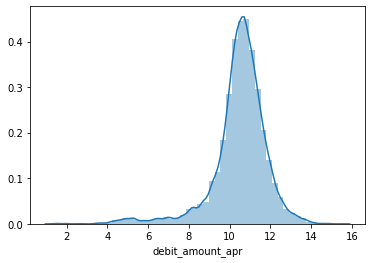

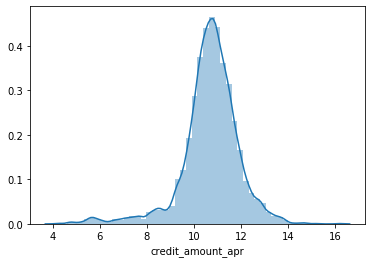

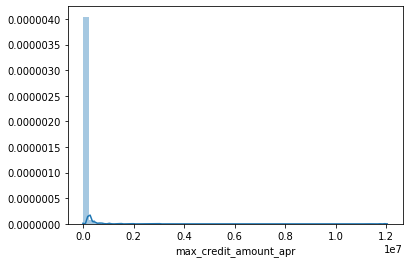

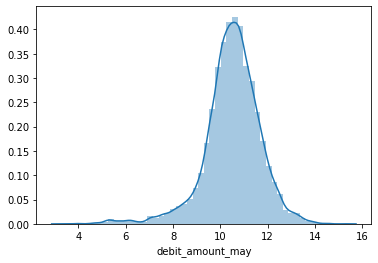

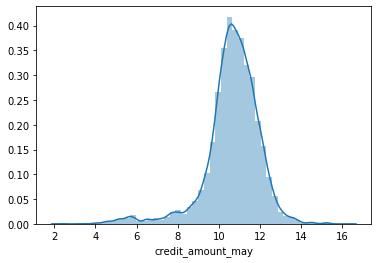

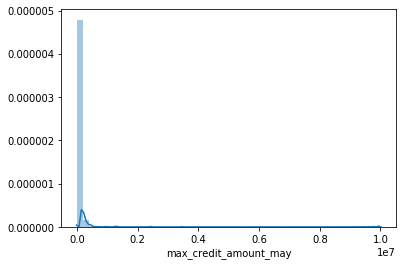

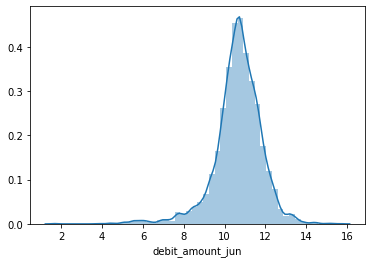

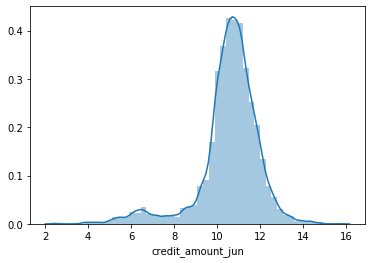

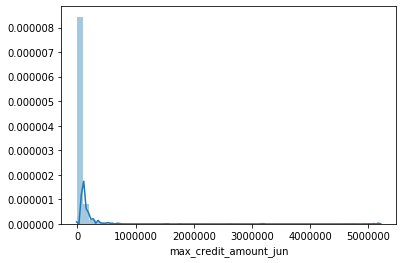

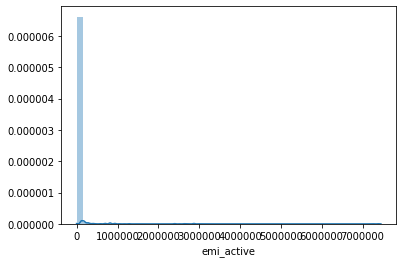

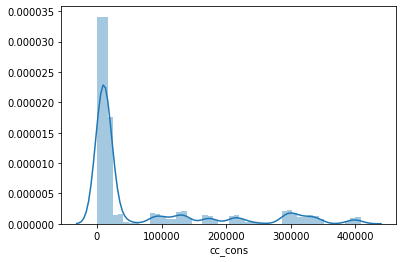

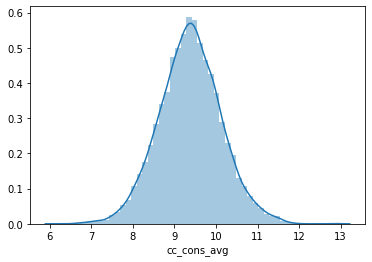

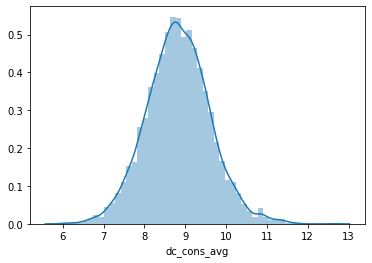

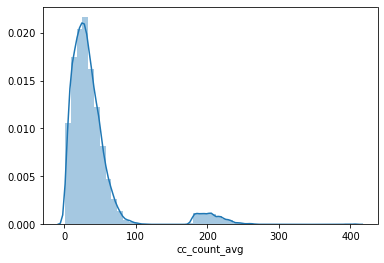

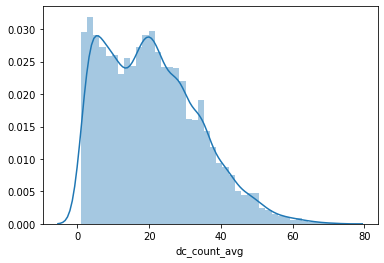

In [196]:
for col in num_cols:
    
    if any(df[col].isna()):
        continue
    
    sns.distplot(df[col])
    plt.show()

## Normalising Right Skewed Data with Log Transformation

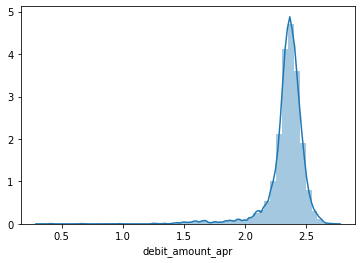

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


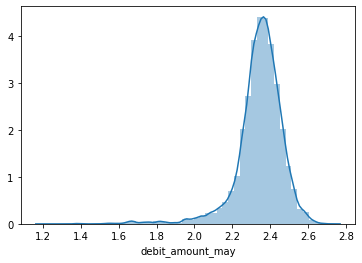

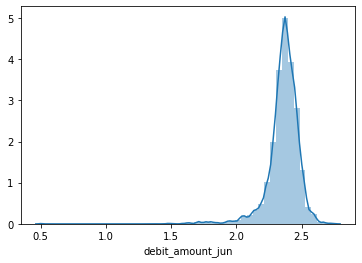

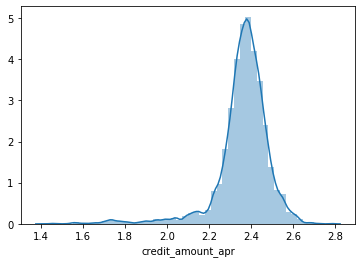

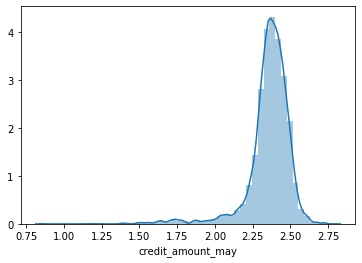

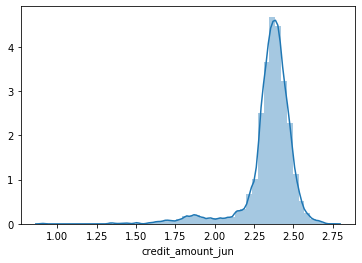

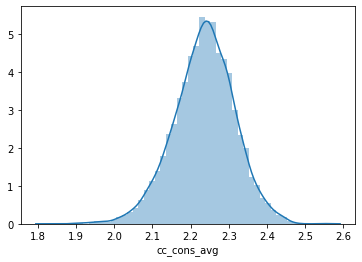

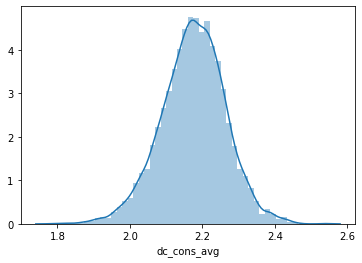

In [197]:
right_skewed_cols = [
    
    'debit_amount_apr',
    'debit_amount_may',
    'debit_amount_jun',
    
    'credit_amount_apr',
    'credit_amount_may',
    'credit_amount_jun',
    
    'cc_cons_avg',
    'dc_cons_avg',
]


def log_transfrom(col):
    
    transformed_col = np.log(df[col])
    sns.distplot(transformed_col)
    plt.show()
    
    return transformed_col


for col in right_skewed_cols:
    
    df[col] = log_transfrom(col)